<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG4983/blob/master/W4_BMEG4983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://brand.uark.edu/_resources/images/UA_Logo_Horizontal.jpg width="400" height="96">

###BMEG 4983 - Genome Engineering and Synthetic Biology - 
###For more information, check out the Nelson lab for Therapeutic Genome Engineering (https://nelsonlab.uark.edu/)


#Data Workshop 4 - DNA alignment and Sanger sequencing

Side note, if anyone tried out coding to solve wordle, check out this video:
https://www.youtube.com/watch?v=v68zYyaEmEA

#4.1 Review: Transcribe and Translate - Write your own function

If you had a DNA sequence, could you make an RNA sequence? What about a protein sequence?

In [ ]:
#Another useful function is to convert DNA into RNA or protein sequences based 
#on the central dogma of DNA described above. 

#Let's start with RNA. This one is fairly straightforward as we only need to 
#replace the T characters with U
def transcribe(input_seq):
  transcribed_seq = input_seq.upper()
  transcribed_seq = transcribed_seq.replace("T", "U")
  return transcribed_seq

#Converting to amino acid seqeuences is a little harder. We will need a codon table
codon_table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                 
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }

#Let's create a function that uses this codon table
def translate(input_seq):
  my_protein ="" #start an empty string for the new protein

  #Let's find the length of this sequence, we don't wan to go over the end, 
  #if the length is not divisible by three, it will leave off the extra DNA
  length_protein = int(len(input_seq)/3)
  
  #Iterate through the string three characters at a time
  for i in range(0, length_protein):
    codon = input_seq[i*3:i*3 + 3]
    my_protein += codon_table[codon]
  return my_protein


# --- Form starts here --- #
#@title What is the sequence you transcribe and translate? { run: "auto" }
mySeq = "ATGATGCAGGTGTAA" #@param {type:"string"}
# --- Form ends here --- #

print(transcribe(mySeq))
print(translate(mySeq))

AUGAUGCAGGUGUAA
MMQV_


# 4.2 DNA Alignment Introduction

##4.2.1 Pairwise vs Multiple sequence alignments
In a pairwise alignment, we want to compare two examples

<img src=http://compbio.pbworks.com/f/2psa.bmp>

In multiple alignment, we might want to make a consensus or map eveolution (in the case of a virus)

**For example:**

<img src=https://www.codoncode.com/images/aligner2.png>


**Try out an example for yourself manually:**

```Python
mySeq1 = "ATCGTCTGA"
mySeq2 = "ATGTTCTGA"
```

How would you align these? Could there be a base-pair substituion? Could there be a gap?

```Python
ATCGTCTGA
|||#|||||
ATGTTCTGA
```


**What about a more ambiguous example:**

```Python
mySeq1 = "ATCGTCTGA"
mySeq2 = "ATGTCTTGA"
```

How would you align these? Could there be a base-pair substituion? Could there be a gap?

**Only allowing mismatches**
```Python
ATCGTCTGA
|||###|||
ATGTCTTGA
```
There are three mismatches

**Try out a gap?**
```Python
ATCGTCT-GA
|||#|||#||
ATG-TCTTGA
```
Now there are two penalities

Which one should you weight more heavily? 

To do this programmatically, we will need to assign weights for these penalities. We can make different kinds of penalties...



*   Mismatch (are different types of mismatches weighted differently?)
*   Opening a gap
*   Extending a gap
*   Score for a correct match?


# 4.3 Recusion and Dynamic Programming

## 4.3.1 The eight queen problem

First we need a program that can look deeply into many possible alignments. Recursion is a process where a function calls on itself. This allows for unique
functionality distinct from for loops and while loops

A good example of this is the 8 queens problem. Imagine you are provided a chess board and 8 queens. The goal is to place 8 queens anywhere on the board such that they cannot attack each other. 

<img src="https://raw.githubusercontent.com/chrisnelsonlab/DIY-Genome-2021/main/images/8queens.png" width="300">


It may be simpler to start with a 4x4 chess board and try to place 4 queens (there are 2 solutions to this version (technically it's only one by symmetry). Try this excercise on a piece of paper or on the image below. Pay attention to your mental process as you try and solve. 


<img src="https://raw.githubusercontent.com/chrisnelsonlab/DIY-Genome-2021/main/images/4queens.png" width="250">

### Writing code to solve it. 

If we tried to write code that would solve this, let's model our mental process. You may have placed a queen on the first column, then moved to the next column and so on until you got stuck. Then you would remove a queen that was already placed and try again. 

If we did the same thing, we could write a function that tried to place a queen. If the function was successful, the function would call itself and try to place another queen. If unsuccessful, the program would back up. 

Look at the code below. Notice that the function placequeens() calls itself?

The function has already been written. Notice that (for example) if you chose a board size of 8, there are 92 wins and 1965 losses. This is an exhausitve search (meaning we found every possible win). 


If we tried this with a for loop that tried every possible placement, there would be 1,700,000,000,000,000 possibilities. If we made the reasonable restriction that there could only be one queen per column, that still leaves us with 16 million possibilities. You could further optimize the looping method by trying only rows that haven't been used which would leave you with 40,000 options. Still a 20 fold improvment to use a recursive method.

This would also scale with larger data sets. For example, a boardsize of 12 gives 800,000 possibilites with the recursive method but 479 million with the loop method.

Also, notice the non-linear nature of the time it takes to complete this calculation. This is another important problem in genomicsas the genome is large and there are many potential alignments that we could choose.  

### Data Collection Challenge
How do the number of solutions scale as a function of the size of the board? Try out several board sizes to see how the number of solutions scales. 

In [3]:
#Code to solve all possible solutions of the 8 queens problem

##ADD TIME TO COMPLETE. 
import time
start = time.time()
#Prints the current board in ascii format. Mainly for debug
def printasciiboard(board):
    for i in range(0,len(board)):
        linetoprint = " "
        for j in range (0,len(board)):
            linetoprint = linetoprint+" "+str(board[i][j])
        print(linetoprint)
    print('')

#This function checks for a given position, if the placed queen would be 
#under attack for a neighbor.
#Checks horizontal and then diaganally. No need to check vertical. Only one
#queen per vertical is placed.   
def checkattack(board,row,column):

    #Check horizontal
    tempvalue = sum(board[row][:])
    if(tempvalue>0):
        return False            
    #Check diaganally once
    for i in range(0,len(board)):
        for j in range(0,len(board)):
            if(board[i][j]==1):  
                if(abs(i-row)==abs(j-column)):
                        return False
    return True


#Recursive function. Trys to place a queen and then calls itself 
#to place an additional queen. Backs up when it hits a dead end.
#Countin: Round 0 first placement, Round 1 second placement, etc
def placequeen(board,column, wins, losses):

    if(sum(sum(board,[])) ==len(board)):
        #printasciiboard(board)   #uncomment to print all winning arrangements
        wins = wins+1
    else:
        losses = losses +1

    for row in range(0,len(board)):
        #Position_attempt = [row][column]
        #print("Row: " +str(row)+"  Column "+str(column))
        
        if (checkattack(board,row,column)):
            board[row][column] = 1
            # This is where the recursion happens!
            board,wins,losses = placequeen(board,column+1,wins,losses)
            board[row][column] = 0

    return board,wins,losses


#Solves for an n x n board. n must be equal. 
#@title What size board do you want to solve?
boardsize = 10 #@param {type:"slider", min:4, max:12, step:1}

if (boardsize < 4):
  boardsize = 4
if (boardsize > 12):
  boardsize = 12
cols = boardsize
rows = boardsize

#make an empty 2D board
board = [[0 for i in range(cols)] for j in range(rows)]

#Print the empty board
printasciiboard(board)

#Count wins and losses
wins = 0
losses = 0

#Begin recursive algorithm
board, wins, losses = placequeen(board,0,wins,losses)
print("wins:"+str(wins))
print("losses:"+str(losses))
end = time.time()
print("time elapsed:"+ str(round((end - start),5)))

  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0

wins:724
losses:34815
time elapsed:3.71382


1. Using the code above, try to find out how many solution exist for chess boards that are 4x4 up through 12x12. How long does each one take? Graph your results to see if there is a trend. *Tip: Comment out the printed board to speed up the program.* 

Hopefully you will note an exponential trend. With each increasing borad size interger, the time it takes to complete the program increases non-linearly.  This is an important problem in data science and will revisted in many problems that involve genetics, logistics, optimization, game design, bitcoin, and many other applications. 

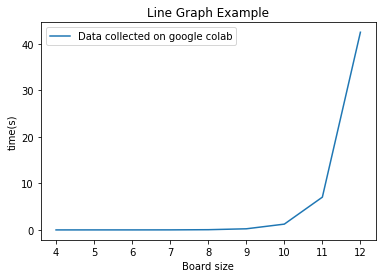

In [ ]:
#Let's graph it. Put your own data in here:
import matplotlib.pyplot as plt
 
x  = [4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = [0.00267, 0.00542, 0.00523, 0.01261, 0.05015, 0.24253, 1.24855, 7.05152, 42.52486]

#uncomment to put your own data in here
#y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]

plt.plot(x, y1, label="Data collected on google colab")

#uncomment to put your own data in here
#plt.plot(x, y2, label="line H")
plt.plot()


plt.xlabel("Board size")
plt.ylabel("time(s)")
plt.title("Line Graph Example")
plt.legend()
plt.show()


## 4.3.2 Fibbonaci Sequence Example

## 4.3.3 The golf tee game

<img src="https://www.cs.virginia.edu/~evans/cs201j/problem-sets/ps4/cbfront.jpg" height=300>

How would you go about solving this?

You could try solving recursivly, try each move in a systematic way, backing up when you can no longer move.

What do we need to know? 

We need to encode the allowable moves in a way that python can understand
We can encode the board like this:

```Python
      0
    1   2
   3  4  5
  6  7  8  9
10 11 12 13 14
```

For example, an allowable move could be from 3, over 1 to 0.  To perform that move, 3 and 1 would be occupied and 0 would be empty.


The code below prints the worst scoring boards and where the position of the last peg in winning arrangments.

In [ ]:
#This function prints an easier to understand ascii board
def asciiartboard(currentboard):
    print('    '+str(currentboard[0]))
    print('   '+str(currentboard[1])+' '+str(currentboard[2]))
    print('  '+str(currentboard[3])+' '+str(currentboard[4])+' '+str(currentboard[5]))
    print(' '+str(currentboard[6])+' '+str(currentboard[7])+' '+str(currentboard[8])+' '+str(currentboard[9]))
    print(str(currentboard[10])+' '+str(currentboard[11])+' '+str(currentboard[12])+' '+str(currentboard[13])+' '+str(currentboard[14]))

#This is the recursive function. It keeps track of a lot of data so we can ask
#questions later (where is the end peg? What is the worst way to lose etc.)

#The function uses:
#currentboard =  the current state of the board
#movelist = the allowable moves
#shortlist = keeping track of what moves we have done
#winlose = a list of how often we have won or lost
#alldata = Keeping a list of all the winning boards
def attemptmove(currentboard,movelist,shortlist,winlose,alldata):
    #Try every move
    trueloss = True

    for i in range(0,len(movelist)):
        tempmove = movelist[i]
        
        #If a move is avilable try it
        if (currentboard[tempmove[0]]==1 and currentboard[tempmove[1]]==1 and currentboard[tempmove[2]]==0):

            currentboard[tempmove[0]]=0  
            currentboard[tempmove[1]]=0
            currentboard[tempmove[2]]=1
            shortlist.append(tempmove)

            #When this returns that means we hit a dead end and need to reverse the last move we made
            shortlist, winlose, alldata = attemptmove(currentboard,movelist,shortlist,winlose, alldata)

            
            if (sum(currentboard) == 1):
                #print('win')
                
                winlose.append(1)            
                for j in range(0, len(currentboard)):
                    if currentboard[j] ==1:
                        alldata.append(j)
                        #this prints only the first winning arrangement
                        if(len(alldata)<2):
                          print(shortlist)
                #backup and go again
                shortlist.pop()               
            else:
                trueloss = True
                for k in range(0, len(movelist)):
                    tempmove2 = movelist[k]
                    if (currentboard[tempmove2[0]]==1 and currentboard[tempmove2[1]]==1 and currentboard[tempmove2[2]]==0):
                        trueloss = False
                if(trueloss):
                    winlose.append(0)
                    #Out of curiosity, what is the worst way to lose?
                    if(len(shortlist)<7):
                        asciiartboard(currentboard)
                        print(shortlist)
                        
   
                shortlist.pop()
                
            #Did we we win? If so append a winning move list
            #did we lose? If so append a loss
            currentboard[tempmove[0]]=1  
            currentboard[tempmove[1]]=1
            currentboard[tempmove[2]]=0

    return shortlist,winlose,alldata

'''
      0
    1   2
   3  4  5
  6  7  8  9
10 11 12 13 14
'''

'''
     0
    1 1
   1 1 1
  1 1 1 1
 1 1 1 1 1
'''

initialsetup = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#@title What is the empty posistion? { run: "auto" }
emptyposition = 4  #@param {type: "slider", min: 0, max: 14}

    
    #DON"T EDIT THIS LINE
initialsetup[emptyposition] = 0
print(initialsetup)
print('here')


#MAKE A MOVE LIST
allowablemoves = []
allowablemoves.append([0,1,3])
allowablemoves.append([0,2,5])
allowablemoves.append([1,3,6])
allowablemoves.append([1,4,8])
allowablemoves.append([2,4,7])
allowablemoves.append([2,5,9])
allowablemoves.append([3,1,0])
allowablemoves.append([3,4,5])
allowablemoves.append([3,6,10])
allowablemoves.append([3,7,12])
allowablemoves.append([4,7,11])
allowablemoves.append([4,8,13])
allowablemoves.append([5,2,0])
allowablemoves.append([5,4,3])
allowablemoves.append([5,8,12])
allowablemoves.append([5,9,14])
allowablemoves.append([6,3,1])
allowablemoves.append([6,7,8])
allowablemoves.append([7,4,2])
allowablemoves.append([7,8,9])
allowablemoves.append([8,4,1])
allowablemoves.append([8,7,6])
allowablemoves.append([9,5,2])
allowablemoves.append([9,8,7])
allowablemoves.append([10,6,3])
allowablemoves.append([10,11,12])
allowablemoves.append([11,7,4])
allowablemoves.append([11,12,13])
allowablemoves.append([12,7,3])
allowablemoves.append([12,8,5])
allowablemoves.append([12,11,10])
allowablemoves.append([12,13,14])
allowablemoves.append([13,8,4])
allowablemoves.append([13,12,11])
allowablemoves.append([14,9,5])
allowablemoves.append([14,13,12])

win = False
#attemptmove(initialsetup,allowablemoves)
currentboard = initialsetup
shortlist = []
alldata = []
winlose = []
shortlist, winlose, alldata = attemptmove(currentboard,allowablemoves,shortlist,winlose, alldata)
print(len(winlose))
print(sum(winlose))
print('made it here')




print('What position does the last peg end up?')
print(alldata.count(0))
print(alldata.count(1))
print(alldata.count(2))
print(alldata.count(3))
print(alldata.count(4))
print(alldata.count(5))
print(alldata.count(6))
print(alldata.count(7))
print(alldata.count(8))
print(alldata.count(9))
print(alldata.count(10))
print(alldata.count(11))
print(alldata.count(12))
print(alldata.count(13))
print(alldata.count(14))

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
here
    1
   1 1
  1 0 1
 1 0 0 1
1 0 1 0 1
[[11, 7, 4], [2, 4, 7], [13, 8, 4], [7, 4, 2]]
[[11, 7, 4], [9, 8, 7], [1, 4, 8], [2, 5, 9], [6, 3, 1], [0, 1, 3], [13, 12, 11], [3, 7, 12], [11, 12, 13], [14, 9, 5], [5, 8, 12], [13, 12, 11], [10, 11, 12]]
    1
   1 1
  1 0 1
 1 0 0 1
1 0 1 0 1
[[13, 8, 4], [1, 4, 8], [11, 7, 4], [8, 4, 1]]
137846
1550
made it here
What position does the last peg end up?
0
0
0
0
0
0
0
0
0
0
0
0
1550
0
0


Another example where the board is a large plus sign (see the comment in the code)


In [ ]:
#This function prints an easier to understand ascii board
def asciiartboard(currentboard):
    print('            '+str(currentboard[0])+'    '+str(currentboard[1])+'    '+str(currentboard[2]))
    print('            '+str(currentboard[3])+'    '+str(currentboard[4])+'    '+str(currentboard[5]))
    print(str(currentboard[6])+'    '+str(currentboard[7])+'    '+str(currentboard[8])+'    '+str(currentboard[9])+'    '+str(currentboard[10])+'    '+str(currentboard[11])+'    '+str(currentboard[12]))
    print(str(currentboard[13])+'    '+str(currentboard[14])+'    '+str(currentboard[15])+'    '+str(currentboard[16])+'    '+str(currentboard[17])+'    '+str(currentboard[18])+'    '+str(currentboard[19]))
    print(str(currentboard[20])+'    '+str(currentboard[21])+'    '+str(currentboard[22])+'    '+str(currentboard[23])+'    '+str(currentboard[24])+'    '+str(currentboard[25])+'    '+str(currentboard[26]))
    print('            '+str(currentboard[27])+'    '+str(currentboard[28])+'    '+str(currentboard[29]))
    print('            '+str(currentboard[30])+'    '+str(currentboard[31])+'    '+str(currentboard[32]))
#This is the recursive function. It keeps track of a lot of data so we can ask
#questions later (where is the end peg? What is the worst way to lose etc.)

#The function uses:
#currentboard =  the current state of the board
#movelist = the allowable moves
#shortlist = keeping track of what moves we have done
#winlose = a list of how often we have won or lost
#alldata = Keeping a list of all the winning boards
def attemptmove(currentboard,movelist,shortlist,winlose,alldata):
    #Try every move
    trueloss = True

    for i in range(0,len(movelist)):
        tempmove = movelist[i]
        
        #If a move is avilable try it
        if (currentboard[tempmove[0]]==1 and currentboard[tempmove[1]]==1 and currentboard[tempmove[2]]==0):

            currentboard[tempmove[0]]=0  
            currentboard[tempmove[1]]=0
            currentboard[tempmove[2]]=1
            shortlist.append(tempmove)

            #When this returns that means we hit a dead end and need to reverse the last move we made
            shortlist, winlose, alldata = attemptmove(currentboard,movelist,shortlist,winlose, alldata)

            
            if (sum(currentboard) == 1):
                #print('win')
                
                winlose.append(1)            
                for j in range(0, len(currentboard)):
                    if currentboard[j] ==1:
                        
                        alldata.append(j)
                        if(alldata[-1]!=16 and alldata[-1]!=31):
                          print('win '+str(len(alldata))+' ends at '+str(alldata[-1]))
                        #this prints only the first winning arrangement
                        if(len(alldata)<2):
                          print(shortlist)
                #backup and go again
                shortlist.pop()               
            else:
                trueloss = True
                for k in range(0, len(movelist)):
                    tempmove2 = movelist[k]
                    if (currentboard[tempmove2[0]]==1 and currentboard[tempmove2[1]]==1 and currentboard[tempmove2[2]]==0):
                        trueloss = False
                if(trueloss):
                    winlose.append(0)
                    #Out of curiosity, what is the worst way to lose?
                    if(len(shortlist)<7):
                        asciiartboard(currentboard)
                        print(shortlist)
                        
   
                shortlist.pop()
                
            #Did we we win? If so append a winning move list
            #did we lose? If so append a loss
            currentboard[tempmove[0]]=1  
            currentboard[tempmove[1]]=1
            currentboard[tempmove[2]]=0

    return shortlist,winlose,alldata

'''
      0  1  2
      3  4  5
6  7  8  9  10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
      27 28 29
      30 31 32

'''

'''
      1  1  2
      3  4  5
6  7  8  9  10 11 12
13 14 15 16 17 18 19
20 11 22 23 24 25 26
      27 28 29
      30 31 32
'''

initialsetup = [1] * 33
#@title What is the empty posistion? { run: "auto" }
emptyposition = 16  #@param {type: "slider", min: 0, max: 32}

    
    #DON"T EDIT THIS LINE
initialsetup[emptyposition] = 0
print(initialsetup)
print('here')


#MAKE A MOVE LIST
allowablemoves = []
allowablemoves.append([0,1,2])
allowablemoves.append([0,3,8])
allowablemoves.append([1,4,9])
allowablemoves.append([2,1,0])
allowablemoves.append([2,5,10])
allowablemoves.append([3,4,5])
allowablemoves.append([3,8,15])
allowablemoves.append([4,9,16])
allowablemoves.append([5,4,3])
allowablemoves.append([5,10,17])
allowablemoves.append([6,7,8])
allowablemoves.append([6,13,20])
allowablemoves.append([7,8,9])
allowablemoves.append([7,14,21])
allowablemoves.append([8,3,0])
allowablemoves.append([8,7,6])
allowablemoves.append([8,15,22])
allowablemoves.append([8,9,10])
allowablemoves.append([9,4,1])
allowablemoves.append([9,8,7])
allowablemoves.append([9,16,23])
allowablemoves.append([9,10,11])
allowablemoves.append([10,5,2])
allowablemoves.append([10,9,8])
allowablemoves.append([10,11,12])
allowablemoves.append([10,17,24])
allowablemoves.append([11,18,25])
allowablemoves.append([11,10,9])
allowablemoves.append([12,11,10])
allowablemoves.append([12,19,26])
allowablemoves.append([13,14,15])
allowablemoves.append([14,15,16])
allowablemoves.append([15,14,13])
allowablemoves.append([15,8,3])
allowablemoves.append([15,16,17])
allowablemoves.append([15,22,27])
allowablemoves.append([16,9,4])
allowablemoves.append([16,15,14])
allowablemoves.append([16,17,18])
allowablemoves.append([16,23,28])
allowablemoves.append([17,18,19])
allowablemoves.append([17,16,15])
allowablemoves.append([17,24,29])
allowablemoves.append([17,10,5])
allowablemoves.append([18,17,16])
allowablemoves.append([19,18,17])
allowablemoves.append([20,13,6])
allowablemoves.append([20,21,22])
allowablemoves.append([21,22,23])
allowablemoves.append([21,14,7])
allowablemoves.append([22,21,20])
allowablemoves.append([22,15,8])
allowablemoves.append([22,27,30])
allowablemoves.append([22,23,24])
allowablemoves.append([23,28,31])
allowablemoves.append([23,22,21])
allowablemoves.append([23,16,9])
allowablemoves.append([23,24,25])
allowablemoves.append([24,29,32])
allowablemoves.append([24,23,22])
allowablemoves.append([24,17,10])
allowablemoves.append([24,25,26])
allowablemoves.append([25,24,23])
allowablemoves.append([25,18,11])
allowablemoves.append([26,19,12])
allowablemoves.append([26,25,24])
allowablemoves.append([27,28,29])
allowablemoves.append([27,22,15])
allowablemoves.append([28,23,16])
allowablemoves.append([29,28,27])
allowablemoves.append([29,24,17])
allowablemoves.append([30,27,22])
allowablemoves.append([30,31,32])
allowablemoves.append([31,28,23])
allowablemoves.append([32,29,24])
allowablemoves.append([32,31,30])

win = False
#attemptmove(initialsetup,allowablemoves)
currentboard = initialsetup
shortlist = []
alldata = []
winlose = []
shortlist, winlose, alldata = attemptmove(currentboard,allowablemoves,shortlist,winlose, alldata)
print(len(winlose))
print(sum(winlose))
print('made it here')




print('What position does the last peg end up?')
print(alldata.count(0))
print(alldata.count(1))
print(alldata.count(2))
print(alldata.count(3))
print(alldata.count(4))
print(alldata.count(5))
print(alldata.count(6))
print(alldata.count(7))
print(alldata.count(8))
print(alldata.count(9))
print(alldata.count(10))
print(alldata.count(11))
print(alldata.count(12))
print(alldata.count(13))
print(alldata.count(14))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
here
[[4, 9, 16], [7, 8, 9], [0, 3, 8], [2, 1, 0], [9, 8, 7], [6, 7, 8], [10, 5, 2], [12, 11, 10], [15, 8, 3], [0, 3, 8], [13, 14, 15], [15, 8, 3], [17, 16, 15], [19, 18, 17], [17, 10, 5], [2, 5, 10], [22, 15, 8], [3, 8, 15], [20, 21, 22], [23, 22, 21], [29, 24, 17], [26, 25, 24], [30, 27, 22], [15, 22, 27], [32, 31, 30], [30, 27, 22], [21, 22, 23], [23, 24, 25], [10, 17, 24], [25, 24, 23], [23, 28, 31]]


In [ ]:
print(alldata)

[]


# 4.4 Making our own Aligner (not optimized)
We will use the Needleman Wunsch algorithm to demonstrate.

There are many options for DNA alignment and algorithms can be highly optimized

This algorith is for demonstration only




In [ ]:
#This function prints an ascii version of our aligment for easier reading
def printasciialign(seqpath1, seqpath2):
  align_str = ''
  for i in range(0,len(seqpath1)):
    if(seqpath1[i]!=seqpath2[i]):
      align_str=align_str+'#'
    else:
      align_str=align_str+'|'
  print(seqpath1)
  print(align_str)
  print(seqpath2)


#This function prints an ascii version of our grid for easier reading
def printascii(SW_matrix,seq1,seq2):
    tempstring = '     '
    for i in range(0,len(seq1)):
        tempstring = tempstring + '  '+seq1[i]
    print(tempstring)
    for i in range(0,len(SW_matrix)):
        if(i ==0):
            tempstring = '  '
            for j in range(0,len(SW_matrix[0])):
                if(SW_matrix[i][j]<10):
                  tempstring = tempstring+'  '+str(SW_matrix[i][j])
                else:
                  tempstring = tempstring+' '+str(SW_matrix[i][j])
        else:
            tempstring = seq2[i-1]+' '
            for j in range(0,len(SW_matrix[0])):
              if(SW_matrix[i][j]<10):
                tempstring = tempstring+'  '+str(SW_matrix[i][j])
              else:
                tempstring = tempstring+' '+str(SW_matrix[i][j])
        print(tempstring)
#This function is the recursive function that seeks to optimize the aligment
#score based on the paramaters we provided 

def findpath(SW_matrix, max_i, max_j, path1, path2,seq1,seq2):
    print('current pos: '+str(max_i)+' '+str(max_j)+' score: '+str(SW_matrix[max_i][max_j]))
    print(path1)
    print(path2)
    if(max_i == 0 or max_j==0):
        print('hit the end')
        return path1,path2
    else:
        #diaganal is best
        if(SW_matrix[max_i-1][max_j-1]>=SW_matrix[max_i][max_j-1]and SW_matrix[max_i-1][max_j-1]>= SW_matrix[max_i-1][max_j]):
            print('move diag')
            path1 = seq1[max_i-1] + path1
            path2 = seq2[max_j-1]+ path2
            path1,path2 = findpath(SW_matrix, max_i-1, max_j-1, path1, path2,seq1,seq2)
            
        elif(SW_matrix[max_i][max_j-1]>SW_matrix[max_i-1][max_j]):
            print('move up')
            path1 = '-'+path1
            path2 = seq2[max_j-1]+ path2
            path1,path2 = findpath(SW_matrix, max_i, max_j-1, path1, path2,seq1,seq2)      
        else:
            print('move left')
            path1 = seq1[max_i-1] + path1
            path2 = '-'+path2

            path1,path2 = findpath(SW_matrix, max_i-1, max_j, path1, path2,seq1,seq2)
    
    print('returning')
    return path1,path2
            
 
#SW version of Needleman–Wunsch algorithm
#No libraries allowed
#@title Comparing sequences { run: "auto" }

#@markdown What paramaters do you want to change?{ run: "auto" }
match_par = 3  #@param {type: "number"}
mismatch = -3  #@param {type: "number"}
gap = -3  #@param {type: "number"}

#@markdown What sequences do you want to compare?{ run: "auto" }
seq1 = "GGTTGACTAGTCTGTTCCTTTC" #@param {type:"string"}
seq2 = "GGTTGACTCTGTTCCTTTCATG" #@param {type:"string"}
# --- Form ends here --- #

m = len(seq1)
n = len(seq2)
SW_matrix = [[0 for i in range(n+1)] for j in range(m+1)] 

max_score = 0
max_i = 0
max_j = 0
for i in range(1, m+1):
    for j in range(1,n+1):
        if(seq1[i-1]==seq2[j-1]):
            score = match_par
        else:
            score = mismatch
           
        diag_score = SW_matrix[i-1][j-1] + score
        up_score   = SW_matrix[i-1][j] + gap
        left_score = SW_matrix[i][j-1] + gap
        newscore = max(0,diag_score,up_score,left_score)
        SW_matrix[i][j]= max(0,diag_score,up_score,left_score)
        if(newscore > max_score):
            max_score = newscore
            max_i = i
            max_j = j
        #printascii(SW_matrix,seq2,seq1)
        #input('enter')
print(max_score)
printascii(SW_matrix,seq2,seq1)
path1 = ''
path2 = ''
path1, path2 = findpath(SW_matrix, max_i, max_j,path1,path2,seq1,seq2)
printasciialign(path1, path2)

48
       G  G  T  T  G  A  C  T  C  T  G  T  T  C  C  T  T  T  C  A  T  G
    0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
G   0  3  3  0  0  3  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  3
G   0  3  6  3  0  3  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  3
T   0  0  3  9  6  3  0  0  3  0  3  0  6  3  0  0  3  3  3  0  0  3  0
T   0  0  0  6 12  9  6  3  3  0  3  0  3  9  6  3  3  6  6  3  0  3  0
G   0  3  3  3  9 15 12  9  6  3  0  6  3  6  6  3  0  3  3  3  0  0  6
A   0  0  0  0  6 12 18 15 12  9  6  3  3  3  3  3  0  0  0  0  6  3  3
C   0  0  0  0  3  9 15 21 18 15 12  9  6  3  6  6  3  0  0  3  3  3  0
T   0  0  0  3  3  6 12 18 24 21 18 15 12  9  6  3  9  6  3  0  0  6  3
A   0  0  0  0  0  3  9 15 21 21 18 15 12  9  6  3  6  6  3  0  3  3  3
G   0  3  3  0  0  3  6 12 18 18 18 21 18 15 12  9  6  3  3  0  0  0  6
T   0  0  0  6  3  0  3  9 15 15 21 18 24 21 18 15 12  9  6  3  0  3  3
C   0  0  0  3  3  0  0  6 12 18 18 18 21 21 24 21 18 15 12  

#4.5 Using Biopython for alignment


## 4.5.1 Installing with pip. Importing some of the features
Read more: https://biopython.org/

In [4]:
#Uncomment this line the first time
!pip install biopython

import Bio
from Bio import AlignIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 
from Bio.Seq import Seq 
#This line makes sure it works
print("Biopython version:", Bio.__version__)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
Biopython version: 1.81


/usr/local/lib/python3.8/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## 4.5.2 Other tools in biopython


In [ ]:
# --- Form starts here --- #
#@title What is the sequence you transcribe and translate? { run: "auto" }
mySeq = "ATGATGCAGGTGTAA" #@param {type:"string"}
# --- Form ends here --- #

#mySeq now is a string. To use Biopthon, we need it to be a sequence object like this:
mySeq2 = Seq(mySeq)

#You can find a seqeunce within a sequence (the first instance)
print("I found an ATG at positition : "+str(mySeq2.find("ATG")))

#Count the number of bases 
print("There are a total of "+str(mySeq2.count("A"))+ " instances of A")

#Important note, this is a non-overlapping count
print("There are a total of " + str(Seq("AAAA").count("AA")) + " counts of AA")

#Transcribe
myRNA = mySeq2.transcribe()
print("The RNA is: "+myRNA)

#Reverse Complement
mySeq2_RC = mySeq2.reverse_complement()
print("The reverse complement is: "+mySeq2_RC)

#You can also translate DNA (or RNA). Assumed to be coding strand
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
myPro = mySeq2.translate()
print("My protein: "+myPro)


I found an ATG at positition : 0
There are a total of 5 instances of A
There are a total of 2 counts of AA
The RNA is: AUGAUGCAGGUGUAA
The reverse complement is: TTACACCTGCATCAT
My protein: MMQV*


##4.5.3 DNA alignment in biopython

In [ ]:
seq1 = Seq("ATGTCTGTCTAG")
seq2 = Seq("ATGTCTCTAG")
alignments = pairwise2.align.globalxx(seq1, seq2)
for alignment in alignments: 
    print(format_alignment(*alignment)) 

seq1 = Seq("GGTTGACTAGTCTGTTCCTTTC")
seq2 = Seq("TGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTTGCCATGTAGACCCCTTGGGTTGACTAGTCTGTTCCTTTCCCGCACCTTGTCATGTACCATCAATAAAGTACCCTGTGCTCAACCA")
alignments = pairwise2.align.globalxx(seq1, seq2)
for alignment in alignments: 
    print(format_alignment(*alignment)) 
    
#CODE  DESCRIPTION
#x     No parameters. Identical characters have score of 1, otherwise 0.
#m     A match score is the score of identical chars, otherwise mismatch
#      score.
#d     A dictionary returns the score of any pair of characters.
#c     A callback function returns scores.

#CODE  DESCRIPTION
#x     No gap penalties.
#s     Same open and extend gap penalties for both sequences.
#d     The sequences have different open and extend gap penalties.
#c     A callback function returns the gap penalties.    
    
#Change settings to decrease gap extending penalty
seq1 = Seq("GGTTGACTAGTCTGTTCCTTTC")
seq2 = Seq("TGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTTGCCATGTAGACCCCTTGGGTTGACTAGTCTGTTCCTTTCCCGCACCTTGTCATGTACCATCAATAAAGTACCCTGTGCTCAACCA")
#2 points for match, minus one for mismatch,, -.5 for opening a gap, -.1 for extending the gap
alignments = pairwise2.align.globalms(seq1, seq2,2, -1, -.5, -.1)
for alignment in alignments: 
    print(format_alignment(*alignment))

#Try a semi-global
alignments = pairwise2.align.globalms(seq1, seq2,2, -1, -1, -1, penalize_end_gaps=(False, False))
for alignment in alignments: 
    print(format_alignment(*alignment))

#Local alignment
alignments = pairwise2.align.localms(seq1,seq2, 2, -1, -3, -3)
for alignment in alignments: 
    print(format_alignment(*alignment))

    
seq1 = Seq("GENEEDITINGISMYEASIESTCLASS")
seq2 = Seq("GENEEDITINGISNTEASYASACLASS")
alignments = pairwise2.align.localms(seq1,seq2, 2, -1, -3, -3)
for alignment in alignments: 
    print(format_alignment(*alignment))

    

ATGTCTGTCTAG
|||||  |||||
ATGTC--TCTAG
  Score=10

ATGTCTGTCTAG
||||||  ||||
ATGTCT--CTAG
  Score=10

-GG----T---TG--AC--T-AGTC-----------TG--T-TCC--T--T-----T--C-----------------------------------------------------------------------------------
 ||    |   ||  ||  | ||||           ||  | |||  |  |     |  |                                                                                   
TGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTTGCCATGTAGACCCCTTGGGTTGACTAGTCTGTTCCTTTCCCGCACCTTGTCATGTACCATCAATAAAGTACCCTGTGCTCAACCA
  Score=22

-G-G---T---TG--AC--T-AGTC-----------TG--T-TCC--T--T-----T--C-----------------------------------------------------------------------------------
 | |   |   ||  ||  | ||||           ||  | |||  |  |     |  |                                                                                   
TGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTTGCCATGTAGACCCCTTGGGTTGACTAGTCTGTTCCTTTCCCGCACCTTGTCATGTACCATCAATAAAGTACCCTGTGCTCAACCA
  Score=22

--GG---T--

# 4.6 Homework 4 - Alignment

## 4.6.1 HW4 Problem 1

What is the nucleotide composition and GC content of the mitochondrial genome (see included chrM.fa)? Recall that GC percentage is the percent of G+C. 

*Hint:* 
Write a script to load the chrM.fa file and loop through to find the proportion of each nucleotide. Consider how you would handle ambiguous DNA (e.g. “N”) You can also use built-in tools if you choose. Provide code or pseudocode below. 
Find chrM.fa file here: 
https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/chrM.fa

GC% is defined as the percentage of G bases and C bases.

Put your answer in this table:

<center>

| Base Composition      | Percent |
| :-: | :-: |
| A      | *21% (example)*       |
| C   |         |
| G      |        |
| T   |         |
| GC%      |        |
</center>


In [ ]:
#placeholder code for problem 1

## 4.6.2 HW4 Problem 2
Working for the CDC, you receive the following two sequences from respiratory samples. Can you identify what amino acids substitutions exist between wild type and patient 001? 

```
>sequence of unknown illness wild type
GGCGAGAACGAGGAGGACATCACCATCAACGGCATCAGCATGTACGAGGCCAGCATCGAGAGCACCTGCCTGGCCAGCAGC
>sequence of unknown illness patient 001
GGCGAGAACGAGGAGGACATCACCATCAACGGCATCAGCAACACCGAGGCCAGCTACGCCAGCGCCTGCCTGGCCAGCAGC
```

*Hints:*
* Write your answers as A###Y where A is the amino acid of the wild type, ### is the position within the amino acid sequence and Y is the amino acid of patient 001.

* Assume the sequence starts at 1 which is a GGC = Glycine or G. 
* We will assume only substitutions and no gaps. 
* If using python or matlab for your alignment, heavily penalize gaps:   
 * Python: alignments = pairwise2.align.localms(seq1,seq2, 2, -1, -3, -3)
 * MATLAB: [Score, Alignment] = swalign(seq1,seq2, 'GapOpen',20)



<center>

| Amino acid substitution #      | Substitution |
| :-: | :-: |
| 1      | A007Y (example)       |
| 2   |         |
| 3      |        |
| 4   |         |
| 5      |        |
| 6   |         |
</center>

## 4.6.3 HW4 Problem 3

Show below an alignment of your cDNA with the cDNA from the mouse analog gene.

If your gene is very large, you can use a single exon instead.

Here is an example:

This is an exon from TP53(human):

CTGGAGTCTTCCAGTGTGATGATGGTGAGGATGGGCCTCCGGTTCATGC
CGCCCATGCAGGAACTGTTACACATGTAGTTGTAGTGGATGGTGGTACAG
TCAGAGCCAAC


I'll BLAT this sequence against mouse to find the analogous exon

GCCGGCTCTGAGTATACCACCATCCACTACAAGTACATGTGTAATAGCT
CCTGCATGGGGGGCATGAACCGCCGACCTATCCTTACCATCATCACACTG
GAAGACTCCAG

Now I'll align these two sequences using biopython

In [17]:
seq1 = Seq("CTGGAGTCTTCCAGTGTGATGATGGTGAGGATGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTAGTTGTAGTGGATGGTGGTACAGTCAGAGCCAAC")
seq2 = Seq("GCCGGCTCTGAGTATACCACCATCCACTACAAGTACATGTGTAATAGCTCCTGCATGGGGGGCATGAACCGCCGACCTATCCTTACCATCATCACACTGGAAGACTCCAG")

alignments = pairwise2.align.globalms(seq1, seq2,2, -1, -.5, -.1)

#this will print just the top scoring alignment
alignment = alignments[0]
print(format_alignment(*alignment))

#This will print all alignments
#for alignment in alignments: 
#    print(format_alignment(*alignment))

#notice that didn't go well

#Let's try reverse complementing the sequence
seq2RC = seq2.reverse_complement()

alignments = pairwise2.align.globalms(seq1, seq2RC,2, -1, -.5, -.1)

#this will print just the top scoring alignment
alignmentRC = alignments[0]
print(format_alignment(*alignmentRC))

#for alignment in alignments: 
#    print(format_alignment(*alignment))


-------CTGGAGT-------CT-TCCAG-T----GTGATG-ATGGTG----AG-----G-ATGGGCCTCCGGTT-CATG--CCGC---CC-ATGCAGGAACTGTTACACATGT-AGTTGT---AG-TGGATGGTG-GTACAGTC-AGAGCCAAC
       || ||||       |  ||||  |    || |   || |||    ||     | |||||     ||   ||||  ||||   || || |     |  |||| ||  | |    |   |  ||||      | ||  || ||       
GCCGGCTCT-GAGTATACCACC-ATCCA-CTACAAGT-A--CAT-GTGTAATAGCTCCTGCATGGG-----GG--GCATGAACCGCCGACCTAT-C-----C--TTAC-CA--TCA----TCACA-CTGGA-----AG-AC--TCCAG-------
  Score=106.2

CTGGAGTCTTCCAGTGTGATGATGGTGA-GGAT-GGGCCTC--CGGTTCATGCCGCCC-ATGCAGGAA-CTG-TTACACATGTAG-TTGTAGTGGATGGTGG--TACAGTCAGAGCCAA--C
|||||||||||||||||||||||||| | |||| ||   ||  ||||||||||| ||| ||||||| | ||  |||||||||||  ||||||||||||||||  |||  ||||||||    |
CTGGAGTCTTCCAGTGTGATGATGGT-AAGGATAGG---TCGGCGGTTCATGCC-CCCCATGCAGG-AGCT-ATTACACATGTA-CTTGTAGTGGATGGTGGTATAC--TCAGAGCC--GGC
  Score=186.8

